# <img style="float: left; padding-right: 10px; width: 45px" src="iacs.png"> S-109A Introduction to Data Science: 

## Homework 6: Ensemble Methods, and Neural Networks


**Harvard University**<br/>
**Summer 2018**<br/>
**Instructors**: Pavlos Protopapas, Kevin Rader

<hr style="height:2pt">



In [1]:
from IPython.core.display import HTML
def css_styling(): styles = open("cs109.css", "r").read(); return HTML(styles)
css_styling()

## Assumed Skills:
This assignment presumes knowledge of the following skills:
- Familiarity with sklearn's model objects
- Cross validation to estimate models' future performance
- Booststrapping to build alternative datasets
- Some instruction on Keras' interface for building and training neural networks

Import libraries:

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import cross_val_score
from sklearn.utils import resample
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegressionCV

from keras.models import Sequential
from keras.layers import Dense

%matplotlib inline

import seaborn as sns
pd.set_option('display.width', 1500)
pd.set_option('display.max_columns', 100)

C:\Users\Jason\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# Higgs Boson Discovery

The discovery of the Higgs boson in July 2012 marked a fundamental breakthrough in particle physics. The Higgs boson particle was discovered through experiments at the Large Hadron Collider at CERN, by colliding beams of protons at high energy. A key challenge in analyzing the results of these experiments is to differentiate between collisions that produce Higgs bosons and collisions that produce only background noise. We shall explore the use of ensemble methods for this classification task.

You are provided with data from Monte-Carlo simulations of collisions of particles in a particle collider experiment. The training set is available in `Higgs_train.csv` and the test set is in `Higgs_test.csv`. Each row in these files corresponds to a particle collision described by 28 features (columns 1-28), of which the first 21 features are kinematic properties measured by the particle detectors in the accelerator, and the remaining features are derived by physicists from the first 21 features. The class label is provided in the last column, with a label of 1 indicating that the collision produces Higgs bosons (signal), and a label of 0 indicating that the collision produces other particles (background). 

The data set provided to you is a small subset of the HIGGS data set in the UCI machine learning repository. The following paper contains further details about the data set and the predictors used: <a href = "https://www.nature.com/articles/ncomms5308">Baldi et al., Nature Communications 5, 2014</a>.

In [3]:
data_train = pd.read_csv('data/Higgs_train.csv')
data_test = pd.read_csv('data/Higgs_test.csv')

In [4]:
data_train.head()

,lepton pT,lepton eta,lepton phi,missing energy magnitude,missing energy phi,jet 1 pt,jet 1 eta,jet 1 phi,jet 1 b-tag,jet 2 pt,jet 2 eta,jet 2 phi,jet 2 b-tag,jet 3 pt,jet 3 eta,jet 3 phi,jet 3 b-tag,jet 4 pt,jet 4 eta,jet 4 phi,jet 4 b-tag,m_jj,m_jjj,m_lv,m_jlv,m_bb,m_wbb,m_wwbb,class
0,0.377,-1.5800,-1.7100,0.991,0.114,1.250,0.620,-1.480,2.17,0.754,0.7750,-0.667,2.21,1.280,-1.190,0.505,0.00,1.110,-0.464,0.397,0.00,0.522,1.320,0.982,1.360,0.965,1.310,1.080,1.0
1,0.707,0.0876,-0.4000,0.919,-1.230,1.170,-0.553,0.886,2.17,1.300,0.7620,-1.060,2.21,0.607,0.459,1.020,0.00,0.497,0.956,0.236,0.00,0.440,0.829,0.992,1.160,2.220,1.190,0.938,1.0
2,0.617,0.2660,-1.3500,1.150,1.040,0.955,0.377,-0.148,0.00,1.060,-0.0194,1.110,0.00,1.470,0.205,-1.060,2.55,1.490,-0.398,-0.542,0.00,1.020,1.030,0.986,0.928,1.370,0.982,0.917,1.0
3,0.851,-0.3810,-0.0713,1.470,-0.795,0.692,0.883,0.497,0.00,1.620,0.1240,1.180,1.11,1.290,0.160,-0.916,2.55,0.945,0.796,-1.520,0.00,1.200,1.100,0.987,1.350,1.460,0.995,0.954,1.0
4,0.768,-0.6920,-0.0402,0.615,0.144,0.749,0.397,-0.874,0.00,1.150,0.1270,1.320,2.21,0.730,-0.758,-1.120,0.00,0.848,0.107,0.502,1.55,0.922,0.864,0.983,1.370,0.601,0.919,0.957,0.0


In [5]:
X_train = data_train.iloc[:, data_train.columns != 'class']
y_train = data_train['class'].values
X_test = data_test.iloc[:, data_test.columns != 'class']
y_test = data_test['class'].values

## Question 1 (12pts): A Single Model
We start by fitting a basic model we can compare the other models to. We'll pick an optimally-tuned decision tree as the base model, because we'll later include random forests and want a fair comparison.

<div class='exercise'> Question 1</div>
** 1.1**  Fit a decision tree model to the training set. Determine the depth-of-tree parameter via 5-fold cross-validation and plot the estimated performance +/- 2 standard deviations for the various depths.

** 1.2** Select an appropriate maximum depth-of-tree, and justify your choice.

**1.3** Report the model's classification accuracy on the test set.

**Answers**:  
**1.1:** Fit a decision tree model to the training set. Determine the depth-of-tree parameter via 5-fold cross-validation and plot the estimated performance +/- 2 standard deviations for the various depths.

In [6]:
from sklearn import tree
depths=[1, 2, 3,4, 5, 6, 7, 8, 9, 10, 20, 30, 50]
# your code here
depth_mean = []
depth_std=[]
for i in depths:
    tree_esti = tree.DecisionTreeClassifier(max_depth=i)
    # Perform 5-fold cross validation 
    scores = cross_val_score(estimator=tree_esti, X=X_train, y=y_train, cv=5, n_jobs=4)
    depth_mean.append(scores.mean())
    depth_std.append(2*scores.std())

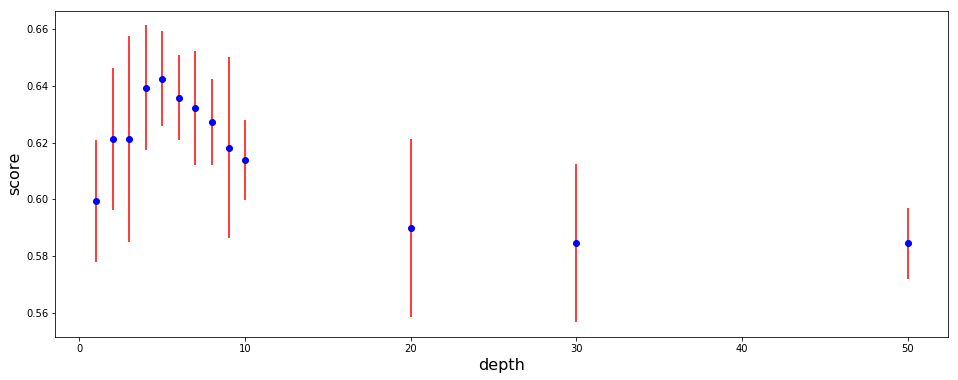

In [7]:
#Plot the score over depths
figure,ax=plt.subplots(figsize=(16, 6))
ax.errorbar(depths, depth_mean, fmt='o', color='b', yerr=depth_std, ecolor='r');
ax.set_ylabel('score', fontsize=16);
ax.set_xlabel('depth', fontsize=16);

** 1.2** Select an apropriate maximum depth-of-tree, and justify your choice.

In [8]:
#Find the best depth-of-tree
mean_array=np.asarray(depth_mean,dtype=np.float32)
print('The maximum depth-of-tree is: {0}'.format(depths[np.argmax(mean_array)]))

The maximum depth-of-tree is: 5


----
Your answer here: **So, the maximum depth-of-tree could be 5.**

----

**1.3** Report the model's classification accuracy on the test set.

In [9]:
#Calculate the classification accuracy on test set
tree_esti = tree.DecisionTreeClassifier(max_depth=5).fit(X_train, y_train)
tree_test_pre=tree_esti.predict(X_test)
print('The classification accuracy on test data is: {:.4f}'.format(np.sum(y_test == tree_test_pre) / len(y_test)))

The classification accuracy on test data is: 0.6480


## Question 2 (14 pts): Bagging
Bagging is the technique of building the same model on multiple bootstraps from the data and combining each model's prediction to get an overall classification. In this question we build an example by hand and study how the number of bootstrapped datasets impacts the combined accuracy.

<div class='exercise'> Question 2</div>
**2.1** Create 25 bootstrapped replications of the original training data, and fit a decision tree of depth 5 to each. Record each tree's prediction. In particular, produce a dataset like those below, where each row is a training example, each column is a tree from the forest, and each entry is that tree's prediction for that training example.

`bagging_train`:

|     |bootstrap model 1's prediction|bootstrap model 2's prediction|...|bootstrap model 25's prediction|
| --- | --- | --- | --- |
|training row 1| binary value | binary value|... |binary value|
|training row 2| binary value| binary value|... |binary value|
|...| ...| ...|... |... |

`bagging_test`:

|     |bootstrap model 1's prediction|bootstrap model 2's prediction|...|bootstrap model 25's prediction|
| --- | --- | --- | --- |
|test row 1| binary value | binary value|... |binary value|
|test row 2| binary value| binary value|... |binary value|
|...| ...| ...|... |... |

Store these results as `bagging_train` and `bagging_test`.

**2.2** _Aggregate_ all 25 _bootstrapped_ models to get a combined prediction for each training and test point: predict a 1 if and only if a majority of the 25 models predict that example to be from class 1. Verify that this bagging model scores either 67% or 68% accuracy on the test set.

**2.3** We want to know how the number of bootstraps affects our bagging ensemble's performance. Use the `running_predictions` function to get the model's accuracy score when using only 1,2,3,4,... of the bootstrapped models. Make a plot of training and test set accuracy as a function of number of bootstraps.

**2.4** Analyze the graph from 2.3 and discuss the effect of adding more bootstrapped models to the ensemble. What number of trees would you use in a production model to be cost-effective?

**Hints**
- Use `resample` from sklearn to easily bootstrap the x and y data.
- use `np.mean` to easily test for majority. If a majority of models vote 1, what does that imply about the mean?

In [10]:
def running_predictions(prediction_dataset, targets):
    """A function to predict examples' class via the majority among trees (ties are predicted as 0)
    
    Inputs:
      prediction_dataset - a (n_examples by n_sub_models) dataset, where each entry [i,j] is sub-model j's prediction
          for example i
      targets - the true class labels
    
    Returns:
      a vector where vec[i] is the model's accuracy when using just the first i+1 sub-models
    """
    
    n_trees = prediction_dataset.shape[1]
    
    # find the running percentage of models voting 1 as more models are considered
    running_percent_1s = np.cumsum(prediction_dataset, axis=1)/np.arange(1,n_trees+1)
    
    # predict 1 when the running average is above 0.5
    running_conclusions = running_percent_1s > 0.5
    
    # check whether the running predictions match the targets
    running_correctnesss = running_conclusions == targets.reshape(-1,1)
    
    return np.mean(running_correctnesss,axis=0)
    # returns a 1-d series of the accuracy of using the first n trees to predict the targets

**Answers**:  
**2.1** Create 25 bootstrapped replications of the original training data, and fit a decision tree of depth 5 to each. In particular, produce a dataset similar to 2.1, where each row is a training example, each column is a tree from the forest, but each entry is that tree's prediction of the _probability_ that training example comes from class 1.

In [11]:
#Generate a list of column names to match the requests of the question
column_names=[]
for i in range(1,26):
    column_names.append('bootstrap model '+str(i)+"'s prediction")

In [12]:
def make_bootstrap_sample(dataset_X, dataset_y, size = None):
  
    # by default return a bootstrap sample of the same size as the original dataset
    if not size: size = len(dataset_X)
    
    # if the X and y datasets aren't the same size, raise an exception
    if len(dataset_X) != len(dataset_y):
        raise Exception("Data size must match between dataset_X and dataset_y")
    
    
    sample_indices = np.random.choice(len(dataset_X), size=size, replace=True)
    
    bootstrap_dataset_X = dataset_X.iloc[sample_indices]
    bootstrap_dataset_y = dataset_y[sample_indices]
    
    # return as a tuple your bootstrap samples of dataset_X as a pandas dataframe
    # and your bootstrap samples of dataset y as a numpy column vector
    
    return (bootstrap_dataset_X, bootstrap_dataset_y)

In [13]:
#Create empty DataFrame and fill the columns suggested by the question
y_train2=y_train.copy()
y_test2=y_test.copy()
bagging_train = pd.DataFrame({'y_train':y_train2})
bagging_test = pd.DataFrame({'y_test':y_test2})

In [14]:
#Call decisiontree classifier
tree_bt = tree.DecisionTreeClassifier(max_depth=5)

In [15]:
#Generate bagging model by using bootstraps
for i in range(25):
    sample_X, sample_y = make_bootstrap_sample(X_train, y_train, size = None)
    predict_train_bt=tree_bt.fit(sample_X, sample_y).predict(X_train)
    predict_test_bt=tree_bt.fit(sample_X, sample_y).predict(X_test)
    bagging_train[column_names[i]]=predict_train_bt
    bagging_test[column_names[i]]=predict_test_bt

In [16]:
bagging_train.head()

,y_train,bootstrap model 1's prediction,bootstrap model 2's prediction,bootstrap model 3's prediction,bootstrap model 4's prediction,bootstrap model 5's prediction,bootstrap model 6's prediction,bootstrap model 7's prediction,bootstrap model 8's prediction,bootstrap model 9's prediction,bootstrap model 10's prediction,bootstrap model 11's prediction,bootstrap model 12's prediction,bootstrap model 13's prediction,bootstrap model 14's prediction,bootstrap model 15's prediction,bootstrap model 16's prediction,bootstrap model 17's prediction,bootstrap model 18's prediction,bootstrap model 19's prediction,bootstrap model 20's prediction,bootstrap model 21's prediction,bootstrap model 22's prediction,bootstrap model 23's prediction,bootstrap model 24's prediction,bootstrap model 25's prediction
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
3,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
4,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [17]:
bagging_test.head()

,y_test,bootstrap model 1's prediction,bootstrap model 2's prediction,bootstrap model 3's prediction,bootstrap model 4's prediction,bootstrap model 5's prediction,bootstrap model 6's prediction,bootstrap model 7's prediction,bootstrap model 8's prediction,bootstrap model 9's prediction,bootstrap model 10's prediction,bootstrap model 11's prediction,bootstrap model 12's prediction,bootstrap model 13's prediction,bootstrap model 14's prediction,bootstrap model 15's prediction,bootstrap model 16's prediction,bootstrap model 17's prediction,bootstrap model 18's prediction,bootstrap model 19's prediction,bootstrap model 20's prediction,bootstrap model 21's prediction,bootstrap model 22's prediction,bootstrap model 23's prediction,bootstrap model 24's prediction,bootstrap model 25's prediction
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
1,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
2,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


**2.2** _Aggregate_ all 25 _bootstrapped_ models to get a combined prediction for each training and test point: predict a 1 if and only if a majority of the 25 models predict that example to be from class 1. Verify that this bagging model scores either 67% or 68% accuracy on the test set.

In [18]:
#Check the classification accuracy on test data
bagging_test_comb=bagging_test.drop(['y_test'],axis=1)
Comb_test_predictions = np.mean(bagging_test_comb,axis=1) >.5
print("Test accuracy: {:.0f}".format((np.mean(y_test == Comb_test_predictions))*100),'%')

Test accuracy: 68 %


**2.3** We want to know how the number of bootstraps affects our bagging ensemble's performance. Use the `running_predictions` function to get the model's accuracy score when using only 1,2,3,4,... of the bootstrapped models. Make a plot of training and test set accuracy as a function of number of bootstraps.

In [19]:
#Check the effect of boostraps time on the score of the essembled model.
bt_time = range(0, 25)
train_df = pd.DataFrame()
test_df=pd.DataFrame()
train_score=[]
test_score=[]
for i in bt_time:
    for j in range(-1,i):
        sample_X, sample_y = make_bootstrap_sample(X_train, y_train, size = None)
        predict_train_bt1=tree_bt.fit(sample_X, sample_y).predict(X_train)
        predict_test_bt1=tree_bt.fit(sample_X, sample_y).predict(X_test)
        train_df[column_names[i]]=predict_train_bt1
        test_df[column_names[i]]=predict_test_bt1
    train_score.append(np.mean(running_predictions(train_df.values, y_train)))
    test_score.append(np.mean(running_predictions(test_df.values, y_test)))

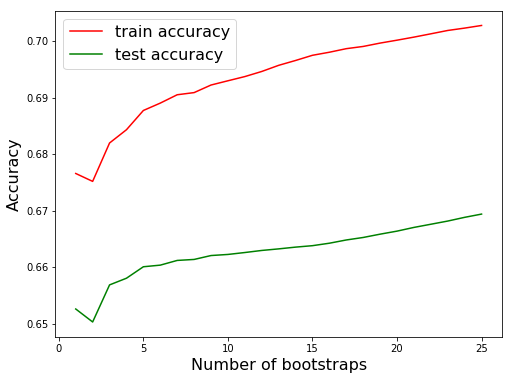

In [20]:
#PLot the classification accuracy on training and test data
n_boots=range(1,26)
figure,ax=plt.subplots(figsize=(8, 6))
ax.plot(n_boots, train_score, color='r', label='train accuracy');
ax.plot(n_boots, test_score, color='g',label='test accuracy');
ax.set_ylabel('Accuracy', fontsize=16);
ax.set_xlabel('Number of bootstraps', fontsize=16);
ax.legend(fontsize=16);

**2.4** Analyze the graph from 2.3 and discuss the effect of adding more bootstrapped models to the ensemble. What number of trees would you use in a production model to be cost-effective?

----
Your answer here: **Adding more bootstrapped models, the accuracy of the ensemble increases, and reaches a plateau. In this case, a combined model with 10 trees could be a cost-effective model.**

----

## Question 3 (6 pts): Random Forests
Random Forests are closely related to the bagging model we built by hand in question 2. In this question we compare our by-hand results with the results of using `RandomForestClassifier` directly.

<div class='exercise'> Question 3</div>
**3.1** Fit a `RandomForestClassifier` to the original `X_train` data using 25 trees and a depth of 5. Comment on the model's test performance compared to the bagging model from Question 2.

**3.2** There are two improvements Random Forests make to the pure bagging approach in Question 2. What are they, and how do they help the random forest model do better than the pure bagging model?

**Hints**:
 - Random forests do not combine each tree's prediction via a majority vote. What do they use instead?

## **Answers**:  
**3.1** Fit a `RandomForestClassifier` to the original `X_train` data using 25 trees and a depth of 5. Comment on the model's test performance compared to the model from Question 2.

In [21]:
#Fit training data by Random Forest Classifier
random_tree=RandomForestClassifier(n_estimators=25, max_depth=5).fit(X_train, y_train)

In [22]:
#Report the classification accuracy
train_random_pred=random_tree.predict(X_train)
print('The classification accuracy on random forests on training data is: {:.4f}'.format(np.sum(y_train == train_random_pred) / len(y_train)))
test_random_pred=random_tree.predict(X_test)
print('The classification accuracy on random forests on test data is: {:.4f}'.format(np.sum(y_test == test_random_pred) / len(y_test)))

The classification accuracy on random forests on training data is: 0.7264
The classification accuracy on random forests on test data is: 0.6866


----
Your answer here: **Compare to the model in Question 2, the classification accuracies of this model on both training and test data are slightly higher.** 

----

**3.2** There are two improvements Random Forests make to the pure bagging approach in Question 2. What are they, and how do they help the random forest model do better than the pure bagging model?

----
Your answer here: **Compare to bagging, Random forests improves the bagging model by reducing variance and potential correlation.**

----

## Question 4 (12 pts): Boosting
In this question we explore a counterpart to bagging, where each new model is trained on a dataset weighted towards observations that the current set of models predicts incorrectly. 

We'll focus on the AdaBoost flavor of boosting and examine what happens to the ensemble model's accuracy over the algorithm's run.

<div class='exercise'> Question 4</div>
**4.1** Use `AdaBoostClassifier` to fit another ensemble to `X_train`. Use a decision tree of depth 3 as the base learner and a learning rate 0.05, and run the boosting for 400 iterations. Use the `staged_score` method to help make a plot of the effect of the number of estimators/iterations on the model's train and test accuracy.  

**4.2** Repeat the plot above for a base learner with depth in (1,2,3,4). What trends do you see in the training and test accuracy?

**4.3** Based on the plot from 4.2, what combination of base learner depth and number of iterations seems optimal? Why?

**4.4** AdaBoost doesn't combine its sub-models via simple majority vote, or by averaging probabilities. What does it use instead, and why do you think that combination rule was chosen?

**Answers**:  
**4.1** Use `AdaBoostClassifier` to fit another ensemble to `X_train`. Use a decision tree of depth 3 as the base learner and a learning rate 0.05, and run the boosting for 400 iterations. Use the `staged_score` method to help make a plot of the effect of the number of estimators/iterations on the model's train and test accuracy.

In [23]:
#Fit training data using Adaboostclassifier
adaboost = AdaBoostClassifier(tree.DecisionTreeClassifier(max_depth=3), n_estimators=400, learning_rate=1.0).fit(X_train, y_train)

In [24]:
#Generate a set of scores on both training and test data by different number of iterations
estimators=[1, 3, 5, 10, 20, 50, 80, 100, 200, 400]
train_acc=[]
test_acc=[]
for est in estimators:
    adaboost_model=AdaBoostClassifier(tree.DecisionTreeClassifier(max_depth=3), n_estimators=est, learning_rate=1.0).fit(X_train, y_train)
    train_pred_ada=adaboost_model.predict(X_train)
    test_pred_ada=adaboost_model.predict(X_test)
    train_acc.append(np.sum(y_train == train_pred_ada) / len(y_train))
    test_acc.append(np.sum(y_test == test_pred_ada) / len(y_test))

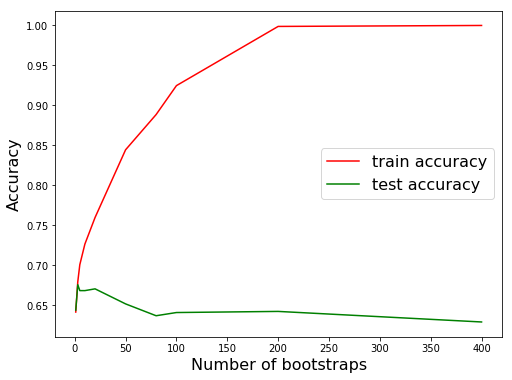

In [25]:
#Visualize the effects of iterations on classification accuracy
figure,ax=plt.subplots(figsize=(8, 6))
ax.plot(estimators, train_acc, color='r', label='train accuracy');
ax.plot(estimators, test_acc, color='g',label='test accuracy');
ax.set_ylabel('Accuracy', fontsize=16);
ax.set_xlabel('Number of bootstraps', fontsize=16);
ax.legend(fontsize=16);

**4.2** Repeat the plot above for a base learner with depth in (1,2,3,4). What trends do you see in the training and test accuracy?

In [26]:
#Check the effect of iterations when depth=1
estimators=[1, 3, 5, 10, 20, 50, 80, 100, 200, 400]
train_acc1=[]
test_acc1=[]
for est in estimators:
    adaboost_model=AdaBoostClassifier(tree.DecisionTreeClassifier(max_depth=1), n_estimators=est, learning_rate=1.0).fit(X_train, y_train)
    train_pred_ada=adaboost_model.predict(X_train)
    test_pred_ada=adaboost_model.predict(X_test)
    train_acc1.append(np.sum(y_train == train_pred_ada) / len(y_train))
    test_acc1.append(np.sum(y_test == test_pred_ada) / len(y_test))

In [27]:
#Check the effect of iterations when depth=2
estimators=[1, 3, 5, 10, 20, 50, 80, 100, 200, 400]
train_acc2=[]
test_acc2=[]
for est in estimators:
    adaboost_model=AdaBoostClassifier(tree.DecisionTreeClassifier(max_depth=2), n_estimators=est, learning_rate=1.0).fit(X_train, y_train)
    train_pred_ada=adaboost_model.predict(X_train)
    test_pred_ada=adaboost_model.predict(X_test)
    train_acc2.append(np.sum(y_train == train_pred_ada) / len(y_train))
    test_acc2.append(np.sum(y_test == test_pred_ada) / len(y_test))

In [28]:
#Check the effect of iterations when depth=4
estimators=[1, 3, 5, 10, 20, 50, 80, 100, 200, 400]
train_acc4=[]
test_acc4=[]
for est in estimators:
    adaboost_model=AdaBoostClassifier(tree.DecisionTreeClassifier(max_depth=4), n_estimators=est, learning_rate=1.0).fit(X_train, y_train)
    train_pred_ada=adaboost_model.predict(X_train)
    test_pred_ada=adaboost_model.predict(X_test)
    train_acc4.append(np.sum(y_train == train_pred_ada) / len(y_train))
    test_acc4.append(np.sum(y_test == test_pred_ada) / len(y_test))

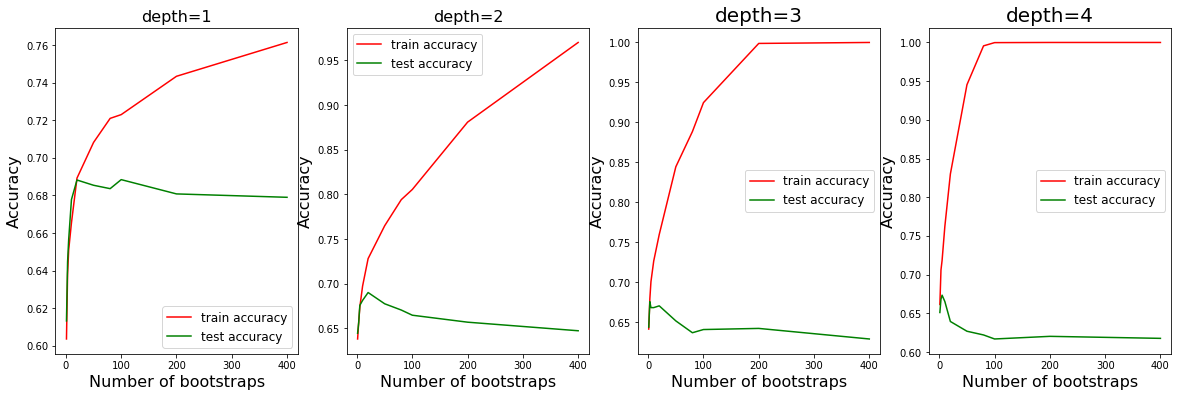

In [29]:
#Plot the classification accuracy on iterations with different depth
figure,axs=plt.subplots(1,4, figsize=(20, 6))
#Depth=1
axs[0].plot(estimators, train_acc1, color='r', label='train accuracy');
axs[0].plot(estimators, test_acc1, color='g',label='test accuracy');
axs[0].set_ylabel('Accuracy', fontsize=16);
axs[0].set_xlabel('Number of bootstraps', fontsize=16);
axs[0].set_title('depth=1', fontsize=16)
axs[0].legend(fontsize=12);
#Depth=2
axs[1].plot(estimators, train_acc2, color='r', label='train accuracy');
axs[1].plot(estimators, test_acc2, color='g',label='test accuracy');
axs[1].set_ylabel('Accuracy', fontsize=16);
axs[1].set_xlabel('Number of bootstraps', fontsize=16);
axs[1].set_title('depth=2', fontsize=16)
axs[1].legend(fontsize=12);
#Depth=3
axs[2].plot(estimators, train_acc, color='r', label='train accuracy');
axs[2].plot(estimators, test_acc, color='g',label='test accuracy');
axs[2].set_ylabel('Accuracy', fontsize=16);
axs[2].set_title('depth=3', fontsize=20)
axs[2].set_xlabel('Number of bootstraps', fontsize=16);
axs[2].legend(fontsize=12);
#Depth=4
axs[3].plot(estimators, train_acc4, color='r', label='train accuracy');
axs[3].plot(estimators, test_acc4, color='g',label='test accuracy');
axs[3].set_ylabel('Accuracy', fontsize=16);
axs[3].set_xlabel('Number of bootstraps', fontsize=16);
axs[3].set_title('depth=4', fontsize=20)
axs[3].legend(fontsize=12);

----
Your answer here: **On the model with depth 3 and 4, the accuracies of training data ncrease very fast, but the test data accuracies are low. These two models seem be overfitted. On the model with depth 2, the accuracy of test data is relatively higher, and training data accuracy increases slowly. In the model with depth 1, the increase rate of training data accuracy is moderate, and the accuracy of test data is relatively high and stable.**

----

**4.3** Based on the plot from 4.2, what combination of base learner depth and number of iterations seems optimal? Why?


In [30]:
print('The optimal iteration number is: {0}'.format(estimators[np.argmax(test_acc2)]))

The optimal iteration number is: 20


----
Your answer here: **The combination with depth 2 and 20 iterations seems optimal. Because it has best classification accuracy on test data, and good accuracy on training data.**

----

**4.4** AdaBoost doesn't combine its sub-models via simple majority vote, or by averaging probabilities. What does it use instead, and why do you think that combination rule was chosen?

----
Your answer here: ** AdaBoost considers the weights of the residuals. When you look at the training data, the accuracy is keeping increasing till reaches 1.**

----

## Question 5 (18 pts): Ensembling
In this question we take the running theme of combining model to its extreme. So far, we have been combining the predictions of relatively bad models; in this section we'll combine several strong models and achieve our best accuracy yet.

We provide well-tuned models in the file `models.pkl`. The code below will read in this data for you. The model_dict object contains 5 tuned models, under the names "Ada", "KNN", "Logit", "QDA", and "RF".

**5.1**: Report each of the 5 tuned models' score on the test set, so that you can compare to these scores later.

**5.2**: Read in the fresh dataset `data/Higgs_tune.csv` Similar to 2.1, build `ensemble_tune` and `ensemble_test`, datasets containing each tuned model's prediction of P(this point belongs to class 1) for each of the tuning and test points.

**5.3**: Build a meta-model trained on `ensemble_tune` and predicting the tuning set labels (e.g., a LogisticRegression or RandomForest). Which model does your meta-model consider most important, and how well does your meta-model perform on the test set?

**5.4**: Augment the `ensemble_tune` and `ensemble_test` datasets with the columns from the original tuning and test data to form `augmented_tune` and `augmented_test`. Fit a decision tree model to this new tuning data (max depth 5, no mximum number of features).

**5.5**: How well does the meta-tree do on the test set? Why does training a decision tree on the combination of original data and model predictions perform so well?

**5.6**: Suggest one way to improve on the model above

In [31]:
# will produce a warning under most versions of SKlearn, but it should be OK to ignore
# if you get weird errors or the models all stink, let us know

import pickle
with open("data/models.pkl", 'rb') as infile:
    model_dict = pickle.load(infile)

**Answers**:

**5.1**: Report each model's score on the test set, so that you can compare to these scores later.

In [32]:
#Using the model to check the scores on test data
scores_models = []
for key in model_dict:
    score=model_dict[key].score(X_test, y_test)
    scores_models.append(score)
    print('The model score on the test set are: ', key, ':', score)

The model score on the test set are:  Ada : 0.6756
The model score on the test set are:  RF : 0.6748
The model score on the test set are:  Logit : 0.6384
The model score on the test set are:  QDA : 0.633
The model score on the test set are:  KNN : 0.5774


**5.2**: Read in the fresh dataset `data/Higgs_tune.csv`.  Similar to 2.1, build `ensemble_tune` and `ensemble_test`, datasets containing each tuned model's prediction of P(this point belongs to class 1) for each of the tuning and test points.

In [33]:
# your code here
#Read tune data
fresh_dataset=pd.read_csv('data/Higgs_tune.csv')

In [34]:
#Drop the response variable
data_tune=fresh_dataset.drop(['class'],axis=1)
data_tune_y=fresh_dataset['class']

In [35]:
#Generate ensemble_tune
ensemble_tune=pd.DataFrame()
for key in model_dict:
    pred_val_tune=model_dict[key].predict(data_tune)
    ensemble_tune[key]=pred_val_tune

In [36]:
#Generate ensemble_test
ensemble_test=pd.DataFrame()
for key in model_dict:
    pred_val=model_dict[key].predict(X_test)
    ensemble_test[key]=pred_val

**5.3**: Build a meta-model trained on `ensemble_tune` and predicting the tuning set labels (e.g., a LogisticRegression or RandomForest). Which model does your meta-model consider most important, and how well does your meta-model perform on the test set?

In [37]:
from sklearn.metrics import accuracy_score

In [38]:
# Use LogisticRegression to grab the weights of the models
fitted_logreg = LogisticRegressionCV().fit(ensemble_tune, data_tune_y)
#Tell the best model in the ensemble
print("The most important model in the meta-model is:", ensemble_tune.columns[np.argmax(fitted_logreg.coef_)])
# use weights and intercept to combine the test data predictions
y_hat = fitted_logreg.predict(ensemble_test)

print("Test accuracy (Classify by LogReg on individual predictions): ", accuracy_score(y_test, y_hat))


The most important model in the meta-model is: RF
Test accuracy (Classify by LogReg on individual predictions):  0.6798


----
Your answer here:**The random forest model is the most important model in the combination. The test accuracy of this meta-model is around 0.68.**

----

**5.4**: Augment the `ensemble_tune` and `ensemble_test` datasets with the columns from the original tuning and test data to form `augmented_tune` and `augmented_test`. Fit a decision tree model to this new tuning data (max depth 5, no mximum number of features).

In [39]:
#Generate the augmented_tune and augmented_test
augmented_tune=pd.concat([ensemble_tune, data_tune], axis=1)
augmented_test=pd.concat([ensemble_test, X_test], axis=1)

In [40]:
meta_decision=tree.DecisionTreeClassifier(max_depth=5).fit(augmented_tune, data_tune_y)

**5.5**: How well does the meta-tree do on the test set? Why does training a decision tree on the combination of original data and model predictions perform so well?

In [41]:
#Report the test accuracy on augmented_test data
y_test_mpred=meta_decision.predict(augmented_test)
print("Test accuracy (Classify by decision tree on augmented data): ", accuracy_score(y_test, y_test_mpred))

Test accuracy (Classify by decision tree on augmented data):  0.68


----
Your answer here: **The meta-tree performed better than the previous model. It's because the five newly merged columns have strong correlation with the response variable.**

----

**5.6**: Suggest one way to improve on the model above

In [42]:
# your code here (optional)
# Use LogisticRegression to grab the weights of the models
fitted_rf = RandomForestClassifier(n_estimators=25, max_depth=5).fit(ensemble_tune, data_tune_y)

# use weights and intercept to combine the test data predictions
y_hat_rf = fitted_rf.predict(ensemble_test)

print("Test accuracy (Classify by random forest on tuned weights): ", accuracy_score(y_test, y_hat_rf))

Test accuracy (Classify by random forest on tuned weights):  0.6814


----
Your answer here: **Use the most important model in the set to train the weights by using tune data. Then combine the weights into the new model to predict test data.**

----

## Question 6 (12 pts): Understanding
This question is an overall test of your knowledge of this homework's material. You may need to refer to lecture notes and other material outside this homework to answer these questions.

<div class='exercise'> Question 6</div>
**6.1** How do ensembling, boosting, and bagging all relate: what is common to all three, and what is unique to each of them?

**6.2** Which technique, boosting or bagging, is better suited to parallelization, where you could have multiple computers working on a problem at the same time?

**6.3** What is the impact of having too many trees/iterations in boosting and in bagging? In which instance is it worse to overshoot?

**6.4** Suppose you have 10,000 training observations and have selected (non-polynomial) linear regression as your base model. Which technique will help your model more, boosting or bagging? How does your choice (and boosting/bagging in general) tie to overfitting versus underfitting?

**Answers**:  
**6.1** How do ensembling, boosting, and bagging all relate: what is common to all three, and what is unique to each of them?

----
Your answer here: **All three methods ensembled multiple models in the model complex. Ensembling collects different classifiers with different prediction capability. Boosting concerns the weights of the residuals, and the new model was improved by combining the weights of the residuals (a simple model from residuals). Bagging emphasizes the average outcomes of the models generated by bootstrapped samples.** 

----

**6.2** Which technique, boosting or bagging, is better suited to parallelization, where you could have multiple computers working on a problem at the same time?

----
Your answer here: **boosting**

----

**6.3** What is the impact of having too many trees/iterations in boosting and in bagging? In which instance is it worse to overshoot?

----
Your answer here: **For boosting, too many trees will result in overfitting, but it's fine with bagging. But too many trees in boosting and bagging will increase the computational time. Boosting is worse to overshoot.**

----

**6.4** Suppose you have 10,000 training examples and have selected (non-polynomial) linear regression as your base model. Which technique will help your model more, boosting or bagging? How does your choice (and boosting/bagging general) tie to overfitting versus underfitting?


----
Your answer here: **I will choose boosting. Due to big size of the training samples, the bias is small, but the variance is uncertain. By using boosting, the variance could be reduced by weighting the error of residuals. Too many steps of boosting could lead to overfitting. Should evaluate the model on tune data, or cross validation to figure out the model with most optimized parameters.** 

----

<hr style='height:2pt'>
## Question 7 (26 points): Neural Networks
Neural networks are, of course, a large and complex topic that cannot be covered in a single homework. Here we'll focus on the key idea of NNs: they are able to learn a mapping from example input data (of fixed size) to example output data (of fixed size). We'll also partially explore what patterns the neural network learns and how well they generalize.

In this question we'll see if Neural Networks can learn a (limited) version of the Fourier Transform. (The Fourier Transform takes in values from some function and returns a set of sine and cosine functions which, when added together, approximate the original function.)

In our specific problem, we'll try to teach a network to map from  a function's 1000 sample y-values to the four features of the sine and cosine waves that make up that function. Thus, the network is attempting to learn a mapping from a 1000-entry vector down to a 4-entry vector. Our X_train dataset is thus N by 1000 and our y_train is N by 4. 

We'll use 6 data files in this question:
- `sinewaves_X_train.npy` and `sinewaves_y_train.npy`: a (10,000 by 1,000) and (10,000 by 4) training dataset. Examples were generated by randomly selecting a,b,c,d in the interval [0,1] and building the curve $a\sin(b\,x) + c\cos(d\,x)$
- `sinewaves_X_test.npy` and `sinewaves_y_test.npy`: a (2,000 by 1,000) and (2,000 by 4) test dataset, generated in the same way as the training data
- `sinewaves_X_extended_test` and `sinewaves_y_extended_test`: a (9 by 1,000) and (9 by 4) test dataset, testing whether the network can generalize beyond the training data (e.g. to negative values of $a$)

**These datasets are read in to their respective variables for you.**

<div class='exercise'> Question 7</div>
**7.1** Plot the first row of the `X_train` training data and visually verify that it is a sinusoidal curve

**7.2** The first row of the `y_train` data is $[0.024, 0.533, 0.018, 0.558]$. Visually or numerically verify that the first row of X_train is 1000 equally-spaced samples in $[0,10\pi]$ from the function $f(x) = 0.24\sin(0.533\,x) + 0.018\cos(0.558\,x)$. This pattern (y_train is the true parameters of the curve in X_train) will always hold.

**7.3** Use `Sequential` and `Dense` from Keras to build a fully-connected neural network. You can choose any number of layers and any number of nodes in each layer. 

**7.4** Compile your model via the line `model.compile(loss='mean_absolute_error', optimizer='adam')` and display the `.summary()`. Explain why the first layer in your network has the indicated number of parameters.

**7.5** Fit your model to the data for 50 epochs using a batch size of 32 and a validation split of 0.2. You can train for longer if you wish- the fit tends to improve over time.

**7.6** Use the `plot_predictions` function to plot the model's predictions on `X_test` to the true values in `y_test` (by default, it will only plot the first few rows). Report the model's overall loss on the test set. Comment on how well the model performs on this unseen data. Do you think it has accurately learned how to map from sample data to the coefficients that generated the data?

**7.7** Examine the model's performance on the 9 train/test pairs in the `extended_test` variables. Which examples does the model do well on, and which examples does it struggle with?

**7.8** Is there something that stands out about the difficult examples, especially with respect to the data the model was trained on? Did the model learn the mapping we had in mind? Would you say the model is overfit, underfit, or neither?

**Hint**:
- Keras's documentation and examples of a Sequential model are a good place to start.
- A strong model can achieve validation error of around 0.03 on this data and 0.02 is very good.

In [43]:
def plot_predictions(model, test_x, test_y, count=None):
    # Model - a Keras or SKlearn model that takes in (n,1000) training data and predicts (n,4) output data
    # test_x - a (n,1000) input dataset
    # test_y - a (n,4) output dataset
    # This function will plot the sine curves in the training data and those implied by the model's predictions.
    # It will also print the predicted and actual output values.
    
    #helper function that takes the n by 4 output and reverse-engineers 
    #the sine curves that output would create
    def y2x(y_data):
        #extract parameters
        a=y_data[:,0].reshape(-1,1)
        b=y_data[:,1].reshape(-1,1)
        c=y_data[:,2].reshape(-1,1)
        d=y_data[:,3].reshape(-1,1)

        #build the matching training data
        x_points = np.linspace(0,10*np.pi,1000)
        x_data = a*np.sin(np.outer(b,x_points)) + c*np.cos(np.outer(d,x_points))
        return x_data
    
    #if <20 examples, plot all. If more, just plot 5
    if count==None:
        if test_x.shape[0]>20:
            count=5
        else:
            count=test_x.shape[0]
    
    #build predictions
    predicted = model.predict(test_x)
    implied_x = y2x(predicted)
    for i in range(count):
        plt.plot(test_x[i,:],label='true')
        plt.plot(implied_x[i,:],label='predicted')
        plt.legend()
        plt.ylim(-2.1,2.1)
        plt.xlabel("x value")
        plt.xlabel("y value")
        plt.title("Curves using the Neural Network's Approximate Fourier Transform")
        plt.show()
        print("true:", test_y[i,:])
        print("predicted:", predicted[i,:])
    
    

In [44]:
X_train = np.load('data/sinewaves_X_train.npy')
y_train = np.load('data/sinewaves_y_train.npy')

X_test = np.load('data/sinewaves_X_test.npy')
y_test = np.load('data/sinewaves_y_test.npy')

X_extended_test = np.load('data/sinewaves_X_extended_test.npy')
y_extended_test = np.load('data/sinewaves_y_extended_test.npy')

**Answers**:  
**7.1** Plot the first row of the `X_train` training data and visually verify that it is a sinusoidal curve

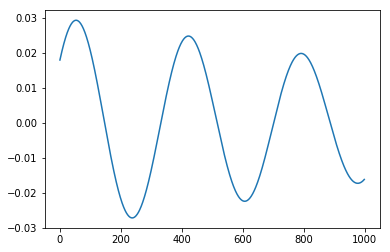

In [45]:
# your code here
plt.plot(X_train[0]);

**7.2** The first row of the `y_train` data is $[0.024, 0.533, 0.018, 0.558]$. Visually or numerically verify that the first row of X_train is 1000 equally-spaced points in $[0,10\pi]$ from the function $f(x) = 0.24\sin(0.533\,x) + 0.018\cos(0.558\,x)$...

In [46]:
#Regernate the first row of X_train using 1000 equally-spaced points in [0,10*pi] from the function mentioned above
x_points=range(0,1000)
num=10*np.pi/1000
f_x=[]
for i in x_points:
    f_x.append(np.sin(0.533*i*num)*0.024+np.cos(0.558*i*num)*0.018)

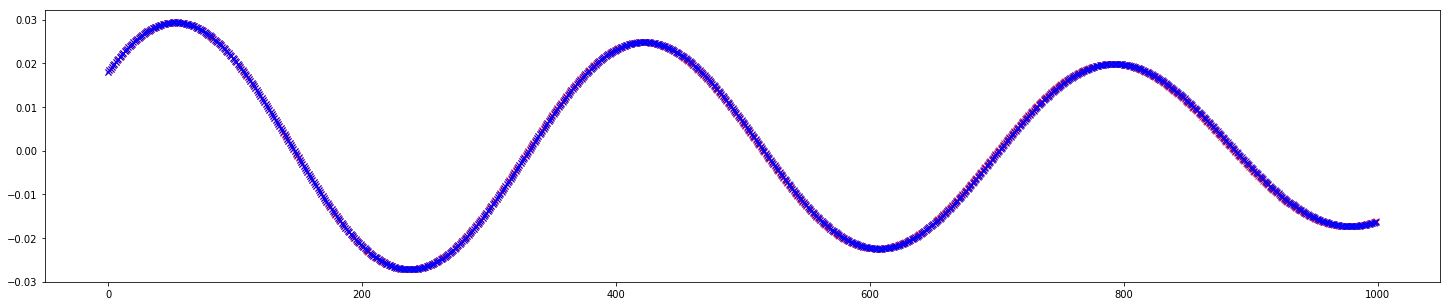

In [47]:
#Overlap the hand-made numbers from the function and the first row of X_train
fig, ax=plt.subplots(figsize=(25, 5));
ax.plot(X_train[0], 'x', color='r');
ax.plot(f_x, 'x', color='b')

**7.3** Use `Sequential` and `Dense` from Keras to build a fully-connected neural network. You can choose any number of layers and any number of nodes in each layer. 

In [48]:
X_train.shape

(10000, 1000)

In [49]:
#Generate NN model
model = Sequential([
    Dense(500, input_shape=(1000,), activation='relu'),
    Dense(100, activation='relu'),
    Dense(50, activation='relu'),
    Dense(10, activation='relu'),
    Dense(4, activation='softmax')
])

**7.4** Compile your model via the line `model.compile(loss='mean_absolute_error', optimizer='adam')` and display the `.summary()`. Explain why the first layer in your network has the indicated number of parameters.

In [50]:
#Compile the NN model 
model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 500)               500500    
_________________________________________________________________
dense_2 (Dense)              (None, 100)               50100     
_________________________________________________________________
dense_3 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_4 (Dense)              (None, 10)                510       
_________________________________________________________________
dense_5 (Dense)              (None, 4)                 44        
Total params: 556,204
Trainable params: 556,204
Non-trainable params: 0
_________________________________________________________________


----
Your answer here: **The first layer is input layer, then the input shape has to be same as the shape of the design matrix of the training data. As for the number of neurons, it's normally a number between the numbers of input and output layers, an average value would be fine.** 

----

**7.5** Fit your model to the data for 50 epochs using a batch size of 32 and a validation split of .2. You can train for longer if you wish- the fit tends to improve over time.

In [51]:
from sklearn.preprocessing import MinMaxScaler
#Normalize the training data
scaler = MinMaxScaler().fit(X_train)
x_train_scaled = scaler.transform(X_train)

In [52]:
# your code here
#Run NN model
model.fit(x_train_scaled, y_train, epochs=50, batch_size=32, validation_split = .2)

Train on 8000 samples, validate on 2000 samples
Epoch 1/50
8000/8000 [==============================] - 17s 2ms/step - loss: 0.2867 - acc: 0.4274 - val_loss: 0.2764 - val_acc: 0.5045
Epoch 2/50
8000/8000 [==============================] - 7s 843us/step - loss: 0.2711 - acc: 0.4974 - val_loss: 0.2668 - val_acc: 0.5035
Epoch 3/50
8000/8000 [==============================] - 7s 876us/step - loss: 0.2672 - acc: 0.5266 - val_loss: 0.2650 - val_acc: 0.5550
Epoch 4/50
8000/8000 [==============================] - 7s 889us/step - loss: 0.2651 - acc: 0.5573 - val_loss: 0.2637 - val_acc: 0.5595
Epoch 5/50
8000/8000 [==============================] - 7s 815us/step - loss: 0.2652 - acc: 0.5490 - val_loss: 0.2693 - val_acc: 0.5280
Epoch 6/50
8000/8000 [==============================] - 8s 970us/step - loss: 0.2646 - acc: 0.5627 - val_loss: 0.2646 - val_acc: 0.5880
Epoch 7/50
8000/8000 [==============================] - 7s 884us/step - loss: 0.2637 - acc: 0.5689 - val_loss: 0.2627 - val_acc: 0.5580
E

**7.6** Use the `plot_predictions` function to plot the model's predictions on `X-test` to the true values in `y_test` (by default, it will only plot the first few rows). Report the model's overall loss on the test set. Comment on how well the model performs on this unseen data. Do you think it has accurately learned how to map from sample data to the coefecients that generated the data?

In [53]:
# your code here
x_test_scaled = scaler.transform(X_test)

In [54]:
model.evaluate(x_test_scaled, y_test)

2000/2000 [==============================] - 0s 143us/step


[0.26137979555130003, 0.6295]

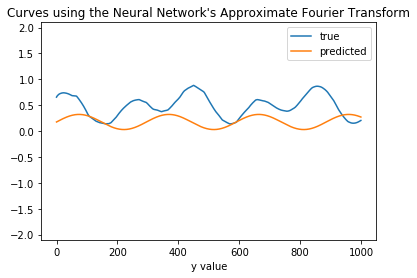

true: [0.86199664 0.98175913 0.65523998 0.4870337 ]
predicted: [0.14604892 0.6771915  0.17565417 0.00110539]


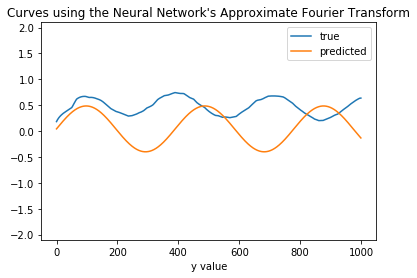

true: [0.8406355  0.63159555 0.18328701 0.11174618]
predicted: [0.4427622  0.51295364 0.04250758 0.00177664]


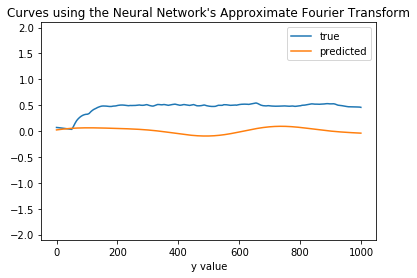

true: [0.06591224 0.75183886 0.06986143 0.91352303]
predicted: [0.07987346 0.32419965 0.02269738 0.5732295 ]


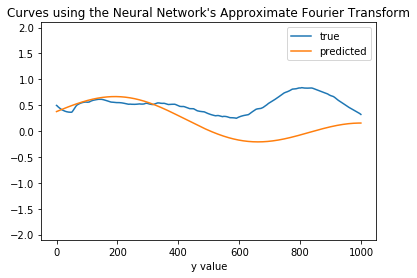

true: [0.75610725 0.30861152 0.49522059 0.48394499]
predicted: [0.31884375 0.24127516 0.37667164 0.06320941]


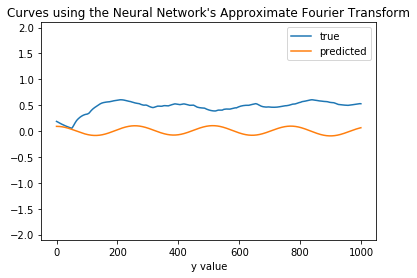

true: [0.2229353  0.27885697 0.18696198 0.94846283]
predicted: [0.01419803 0.11607495 0.09104663 0.7786803 ]


In [55]:
#Plot the accuracy on test data
plot_predictions(model, x_test_scaled, y_test, count=None)

----
Your answer here: **This model works poorly on the unseen data. It failed to accurately learn to map from sample data to the coefecients that generated the data**

----

**7.7** Examine the model's performance on the 9 train/test pairs in the `extended_test` variables. Which examples does the model do well on, and which examples does it struggle with?

In [56]:
# your code here
x_extended_scaled = scaler.transform(X_extended_test)

In [57]:
y_extended_pred=model.predict(x_extended_scaled)

In [58]:
model.evaluate(x_extended_scaled, y_extended_test)

9/9 [==============================] - 0s 444us/step


[0.5270732641220093, 0.2222222238779068]

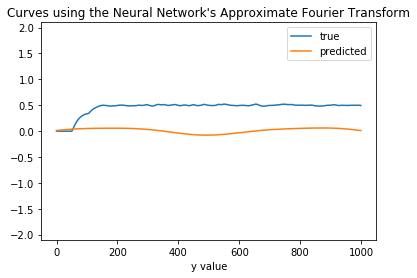

true: [0. 0. 0. 0.]
predicted: [0.06744301 0.29967535 0.01181368 0.621068  ]


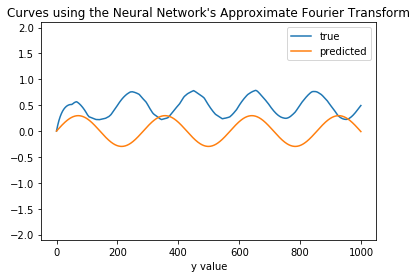

true: [1. 1. 0. 0.]
predicted: [0.29701486 0.7011388  0.00078056 0.00106573]


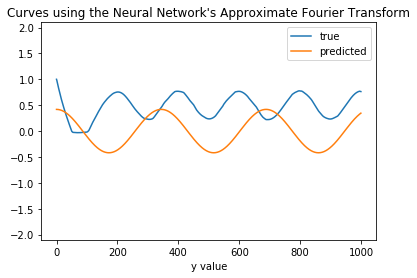

true: [0. 0. 1. 1.]
predicted: [3.5821502e-06 1.6039055e-05 4.1903016e-01 5.8095020e-01]


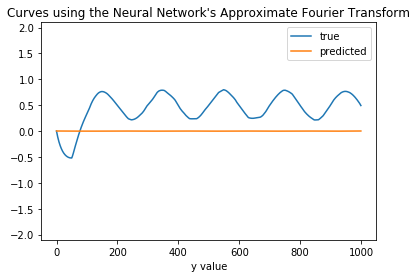

true: [-1.  1.  0.  0.]
predicted: [1.3624774e-03 2.7503096e-04 1.4470781e-03 9.9691546e-01]


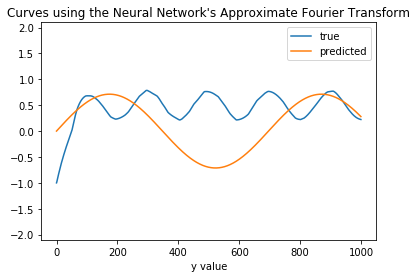

true: [ 0.  0. -1.  1.]
predicted: [7.1276069e-01 2.8714120e-01 4.8458173e-07 9.7592252e-05]


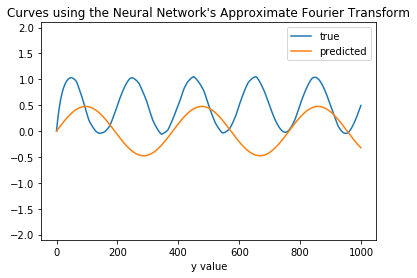

true: [2. 1. 0. 0.]
predicted: [4.7635421e-01 5.2363908e-01 6.1775204e-06 5.8360632e-07]


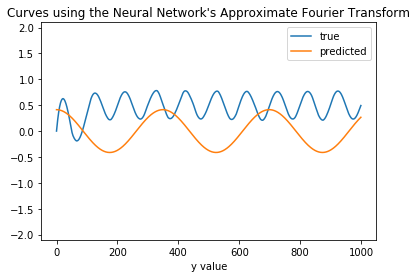

true: [1. 2. 0. 0.]
predicted: [0.00132096 0.0129325  0.4134728  0.5722738 ]


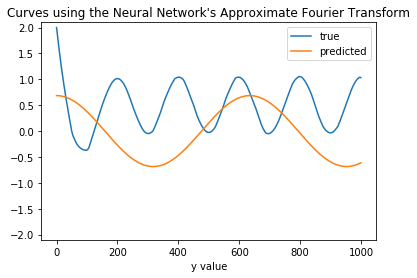

true: [0. 0. 2. 1.]
predicted: [2.2265925e-11 4.4058836e-11 6.8514931e-01 3.1485069e-01]


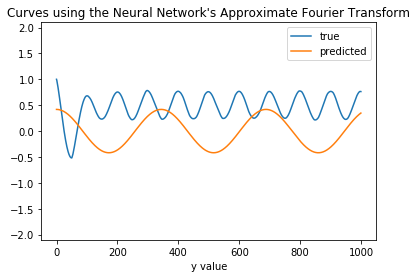

true: [0. 0. 1. 2.]
predicted: [9.2343635e-06 6.3182495e-05 4.1869953e-01 5.8122802e-01]


In [59]:
plot_predictions(model, x_extended_scaled, y_extended_test, count=None)

----
Your answer here： **The model seems to do well on number 3 and 6.  And it struggles on number 1 and 4.**

----

**7.8** Is there something that stands out about the difficult observations, especially with respect to the data the model was trained on? Did the model learn the mapping we had in mind? Would you say the model is overfit, underfit, or neither?

----
Your answer here: **I would say this model is not that difficult since the training data just a function with regular shape. But this model didn't learn well on the mapping we had. I would say the model is overfit.**

----